In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\gabri\Desktop\homicide_by_countries.csv', sep = ';')

In [5]:
df

,Local,Region,Subregion,Rate,Count,Year
0,Myanmar,Asia,South-Eastern Asia,28.4,15299,2021
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Antigua and Barbuda,Americas,Caribbean,9.2,9,2020
...,...,...,...,...,...,...
187,Saint Helena,Africa,Western Africa,0.0,0,2009
188,Saint Pierre and Miquelon,Americas,Northern America,15.8,1,2009
189,Sudan,Africa,Northern Africa,5.1,1702,2008
190,British Virgin Islands,Americas,Caribbean,8.3,2,2006


In [10]:
df.shape

(192, 6)

In [11]:
df.isnull().sum()

Local        0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Local      192 non-null    object
 1   Region     192 non-null    object
 2   Subregion  192 non-null    object
 3   Rate       192 non-null    int32 
 4   Count      192 non-null    int32 
 5   Year       192 non-null    int32 
dtypes: int32(3), object(3)
memory usage: 6.9+ KB


In [8]:
df.describe()

,Rate,Count,Year
count,192.000000,192.000000,192.000000
mean,6.826563,1972.911458,2017.552083
std,9.624748,6600.122245,3.451594
min,0.000000,0.000000,2006.000000
25%,1.100000,33.250000,2016.000000
50%,2.600000,132.500000,2019.000000
75%,7.825000,792.500000,2020.000000
max,49.300000,47722.000000,2021.000000


In [12]:
df['Rate'] = df['Rate'].astype(int)

In [18]:
my_list = ['Rate', 'Count', 'Year']
for i in my_list:
    print(i)
    df[i] = df[i].astype(int)

Rate
Count
Year


In [20]:
df

,Local,Region,Subregion,Rate,Count,Year
0,Myanmar,Asia,South-Eastern Asia,28,15299,2021
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Antigua and Barbuda,Americas,Caribbean,9,9,2020
...,...,...,...,...,...,...
187,Saint Helena,Africa,Western Africa,0,0,2009
188,Saint Pierre and Miquelon,Americas,Northern America,15,1,2009
189,Sudan,Africa,Northern Africa,5,1702,2008
190,British Virgin Islands,Americas,Caribbean,8,2,2006


In [23]:
df1 = df.sort_values('Count', ascending=False).head(5)
df1

,Local,Region,Subregion,Rate,Count,Year
15,Brazil,Americas,South America,22,47722,2020
105,Nigeria,Africa,Western Africa,22,44200,2019
41,India,Asia,Southern Asia,3,40651,2020
58,Mexico,Americas,Central America,28,36579,2020
93,United States,Americas,Northern America,6,21570,2020


In [40]:
df1 = df[['Local', 'Count']].sort_values(by='Count', ascending=False).head(5)
df1['Porcentagem'] = (df1['Count'] * 100 / df1['Count'].sum()).round(2)
df1

,Local,Count,Porcentagem
15,Brazil,47722,25.02
105,Nigeria,44200,23.18
41,India,40651,21.31
58,Mexico,36579,19.18
93,United States,21570,11.31


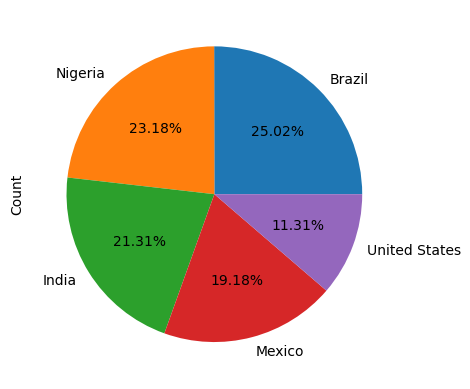

In [39]:
df1.plot(x = 'Local', y = 'Count', kind = 'pie', labels = df1.Local, autopct = '%1.2f%%' )
plt.legend().set_visible(False)

In [44]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending =False)
df2

Region
Americas    153571
Asia        105552
Africa       99460
Europe       19869
Oceania        347
Name: Count, dtype: int32

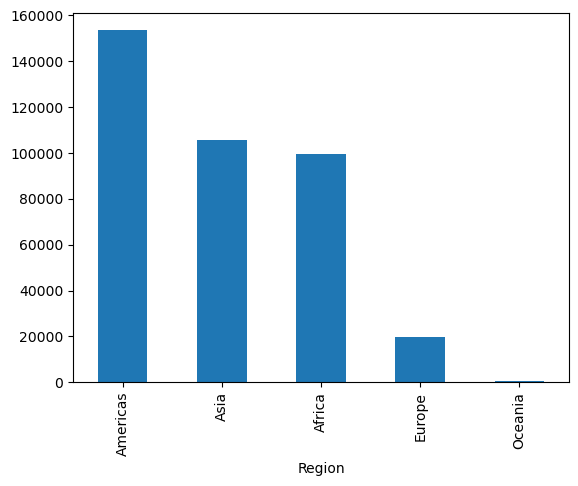

In [46]:
 df2.plot(kind = 'bar')
plt.show()

In [47]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending =False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23654
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5011
Middle Africa              2471
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

In [49]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [50]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23654, 22317, 21479, 14604,
       11638,  8563,  5538,  5011,  2471,  2097,  2075,  1406,  1093,
         347])

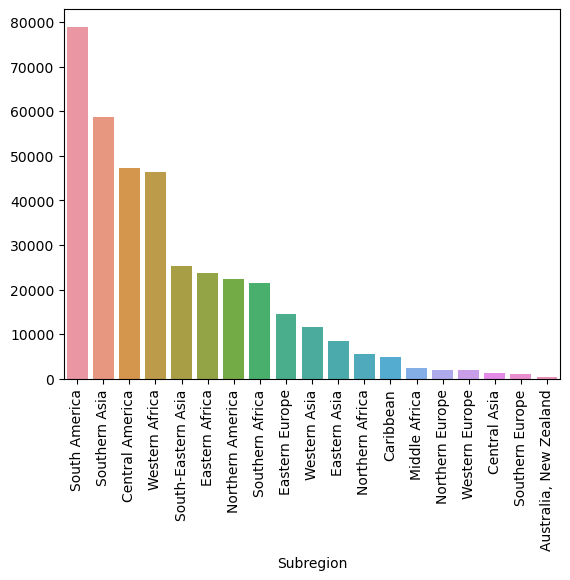

In [53]:
sns.barplot(x= df3.index, y = df3.values)
plt.xticks(rotation = 90)
xlabel = None

In [54]:
df

,Local,Region,Subregion,Rate,Count,Year
0,Myanmar,Asia,South-Eastern Asia,28,15299,2021
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Antigua and Barbuda,Americas,Caribbean,9,9,2020
...,...,...,...,...,...,...
187,Saint Helena,Africa,Western Africa,0,0,2009
188,Saint Pierre and Miquelon,Americas,Northern America,15,1,2009
189,Sudan,Africa,Northern Africa,5,1702,2008
190,British Virgin Islands,Americas,Caribbean,8,2,2006


In [55]:
df[df['Region'].isin(['Asia', 'Europe'])]

,Local,Region,Subregion,Rate,Count,Year
0,Myanmar,Asia,South-Eastern Asia,28,15299,2021
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
6,Armenia,Asia,Western Asia,1,52,2020
8,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
179,San Marino,Europe,Southern Europe,0,0,2011
180,Vietnam,Asia,South-Eastern Asia,1,1358,2011
182,Channel Islands,Europe,Northern Europe,0,0,2010
183,Gibraltar,Europe,Southern Europe,3,1,2010


In [59]:
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]
df4 = df4[df4['Year'] > 2016][['Region', 'Year', 'Count']]
df4

,Region,Year,Count
0,Asia,2021,15299
1,Europe,2020,61
3,Europe,2020,2
6,Asia,2020,52
8,Europe,2020,65
...,...,...,...
126,Europe,2018,755
128,Europe,2017,193
132,Europe,2017,726
136,Asia,2017,1787


In [61]:
df4 = df4.groupby(['Region','Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int32